In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [44]:
df = pd.read_csv('data/CovidData.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/20,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/25/20,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2/26/20,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2/27/20,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2/28/20,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [45]:
df.columns, df.shape

(Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients', 'weekly_icu_admissions',
        'weekly_hosp_admissions', 'new_tests', 'total_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
        'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
        'new_vaccinations', 'total_vaccinations_per_hundred',
        'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
        'stringency_index', 'population', 'population_density', 'median_age',
        'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
        'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
        'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
        'life_expectancy', 'human

In [46]:
df.dtypes

iso_code                                object
continent                               object
location                                object
date                                    object
total_cases                            float64
new_cases                              float64
total_deaths                           float64
new_deaths                             float64
reproduction_rate                      float64
icu_patients                           float64
icu_patients_per_million               float64
hosp_patients                          float64
weekly_icu_admissions                  float64
weekly_hosp_admissions                 float64
new_tests                              float64
total_tests                            float64
total_tests_per_thousand               float64
new_tests_per_thousand                 float64
new_tests_smoothed_per_thousand        float64
positive_rate                          float64
tests_per_case                         float64
total_vaccina

In [47]:
df.isnull().sum()

iso_code                                   0
continent                               4111
location                                   0
date                                       0
total_cases                             2099
new_cases                               2101
total_deaths                           11763
new_deaths                             11605
reproduction_rate                      16229
icu_patients                           76487
icu_patients_per_million               76487
hosp_patients                          74357
weekly_icu_admissions                  84382
weekly_hosp_admissions                 83876
new_tests                              46226
total_tests                            46519
total_tests_per_thousand               46519
new_tests_per_thousand                 46226
new_tests_smoothed_per_thousand        40546
positive_rate                          42267
tests_per_case                         42860
total_vaccinations                     75797
people_vac

In [48]:
locations = df.location.unique()
df.location.nunique()

219

The data also includes information by continent and 'World', the continent field for these rows will be NaN

In [49]:
df_continents = df[(df.continent.isnull()) & (df.location != 'World')]
df_continents.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
432,OWID_AFR,NaN,Africa,2/13/20,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,OWID_AFR,NaN,Africa,2/14/20,1.0,1.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,OWID_AFR,NaN,Africa,2/15/20,1.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,OWID_AFR,NaN,Africa,2/16/20,1.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,OWID_AFR,NaN,Africa,2/17/20,1.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_world = df[df.location == 'World']
df_world.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
83504,OWID_WRL,NaN,World,1/22/20,557.0,0.0,17.0,0.0,NaN,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
83505,OWID_WRL,NaN,World,1/23/20,655.0,98.0,18.0,1.0,3.13,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
83506,OWID_WRL,NaN,World,1/24/20,941.0,286.0,26.0,8.0,3.29,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
83507,OWID_WRL,NaN,World,1/25/20,1433.0,492.0,42.0,16.0,3.45,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
83508,OWID_WRL,NaN,World,1/26/20,2118.0,685.0,56.0,14.0,3.51,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


### Examining Infection by Percentage of Population

In [51]:
df['percentage_infected'] = df['total_cases'] / df['population'] * 100
top10_percentage_infected = df.groupby(['location']).max()['percentage_infected'].sort_values(ascending=False).head(10)

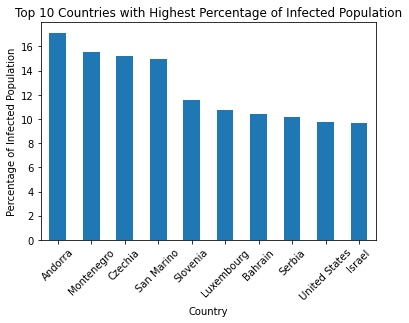

In [52]:
_ = top10_percentage_infected.plot(kind='bar').xaxis.set_tick_params(rotation=45)
_ = plt.xlabel('Country')
_ = plt.ylabel('Percentage of Infected Population')
_ = plt.title('Top 10 Countries with Highest Percentage of Infected Population')

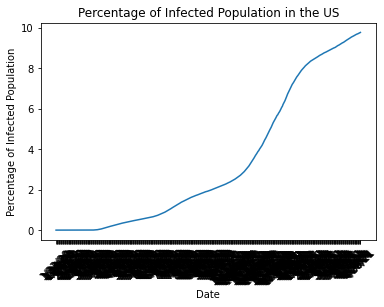

In [53]:
US = df[df.location == 'United States']
_ = plt.plot(US.date, US.percentage_infected)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Date')
_ = plt.ylabel('Percentage of Infected Population')
_ = plt.title('Percentage of Infected Population in the US')

### Examining Countries based on testing frequency

In [54]:
df.drop(df[df.continent.isnull()].index, inplace=True) # drop all continents
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
sum_tests = df.groupby(['year', 'month', 'location']).sum()['new_tests'].reset_index()
sum_tests['date'] = sum_tests.apply(lambda x: datetime.datetime(year=int(x['year']), month=int(x['month']), day=1), axis=1)
US_tests = sum_tests[sum_tests.location == 'United States']
MX_tests = sum_tests[sum_tests.location == 'Mexico']
IN_tests = sum_tests[sum_tests.location == 'India']
RU_tests = sum_tests[sum_tests.location == 'Russia']
UK_tests = sum_tests[sum_tests.location == 'United Kingdom']
IND_tests = sum_tests[sum_tests.location == 'Indonesia']

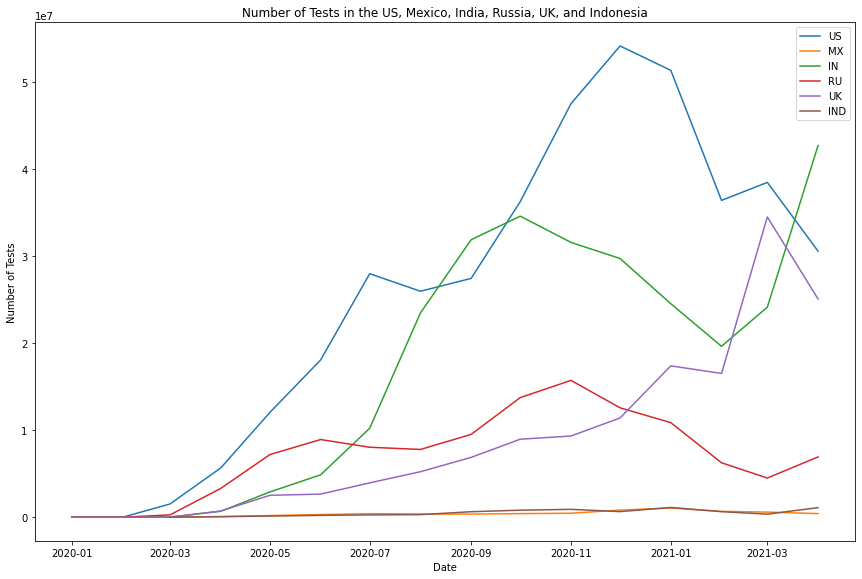

In [55]:
_ = plt.plot(US_tests.date, US_tests.new_tests, label='US')
_ = plt.plot(MX_tests.date, MX_tests.new_tests, label='MX')
_ = plt.plot(IN_tests.date, IN_tests.new_tests, label='IN')
_ = plt.plot(RU_tests.date, RU_tests.new_tests, label='RU')
_ = plt.plot(UK_tests.date, UK_tests.new_tests, label='UK')
_ = plt.plot(IND_tests.date, IND_tests.new_tests, label='IND')
_ = plt.legend()
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of Tests')
_ = plt.title('Number of Tests in the US, Mexico, India, Russia, UK, and Indonesia')
plt.subplots_adjust(left=0.1, bottom=0.2, right=2, top=2, wspace=0.2, hspace=0.4)

<ipython-input-56-2790721aa248>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


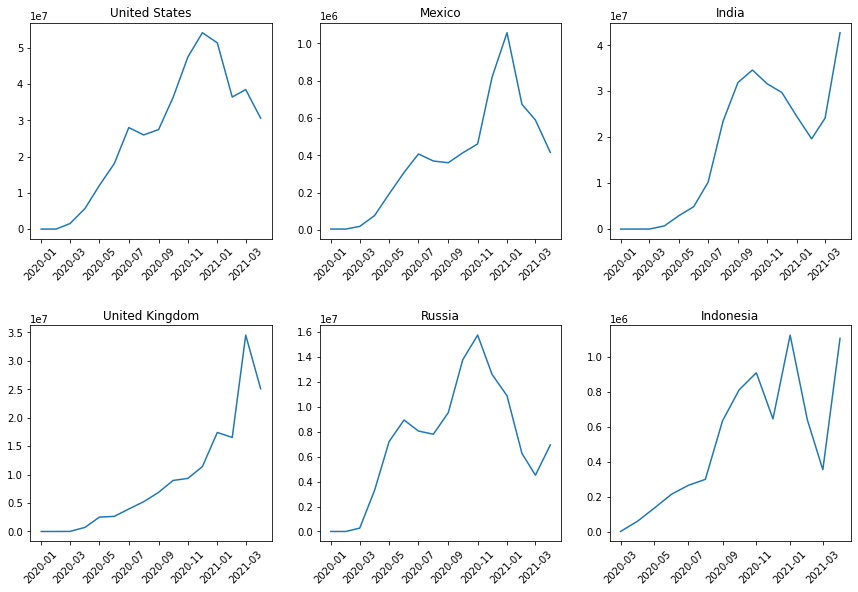

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3)

axes[0, 0].plot(US_tests.date, US_tests.new_tests)
axes[0, 0].set_title('United States')

axes[0, 1].plot(MX_tests.date, MX_tests.new_tests)
axes[0, 1].set_title('Mexico')

axes[0, 2].plot(IN_tests.date, IN_tests.new_tests)
axes[0, 2].set_title('India')

axes[1, 0].plot(UK_tests.date, UK_tests.new_tests)
axes[1, 0].set_title('United Kingdom')

axes[1, 1].plot(RU_tests.date, RU_tests.new_tests)
axes[1, 1].set_title('Russia')

axes[1, 2].plot(IND_tests.date, IND_tests.new_tests)
axes[1, 2].set_title('Indonesia')

plt.subplots_adjust(left=0.1, bottom=0.2, right=2, top=2, wspace=0.2, hspace=0.4)
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


As we can see from the graphs, most countries have an increasing testing rate through 2020 but by looking at the x-axis Indonesia and Mexico our testing far less than countires like Russia, U.S and India. Another interesting thing to note is that there is no testing data on some large copuntries like Brazil or China even though we know that ground 0 was in Wuhan and we would expect rigorous testing to have happened in 2020 and 2021.

In [57]:
df[df.location == 'Brazil'].new_tests.isna().sum()

430

### Q1 - In which timeframe did the world see the largest increase in total cases
Creating a dataframe that has all the total cases summed by month to make it readable when it is plotted.

In [58]:
df_plot_cases = df_world[['date', 'total_cases']]
df_plot_cases['date'] = pd.to_datetime(df_plot_cases['date'])
df_plot_cases['month'] = df_plot_cases['date'].dt.month
df_plot_cases['year'] = df_plot_cases['date'].dt.year
grouped_data = df_plot_cases.groupby(['year', 'month']).sum()['total_cases']
grouped_data = grouped_data.reset_index()
grouped_data['date'] = grouped_data.apply(lambda x: datetime.datetime(year=int(x['year']), month=int(x['month']), day=1), axis=1)
grouped_data

<ipython-input-58-2b92bdee4b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_cases['date'] = pd.to_datetime(df_plot_cases['date'])
<ipython-input-58-2b92bdee4b9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_cases['month'] = df_plot_cases['date'].dt.month
<ipython-input-58-2b92bdee4b9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,year,month,total_cases,date
0,2020,1,3.853800e+04,2020-01-01
1,2020,2,1.672032e+06,2020-02-01
2,2020,3,9.057318e+06,2020-03-01
3,2020,4,6.357041e+07,2020-04-01
4,2020,5,1.452111e+08,2020-05-01
5,2020,6,2.466601e+08,2020-06-01
6,2020,7,4.317799e+08,2020-07-01
7,2020,8,6.716878e+08,2020-08-01
8,2020,9,8.948198e+08,2020-09-01
9,2020,10,1.229233e+09,2020-10-01


This is the plot before aggregating the data, it is messy and uninterpritable but still can be used for seeing the general trend.

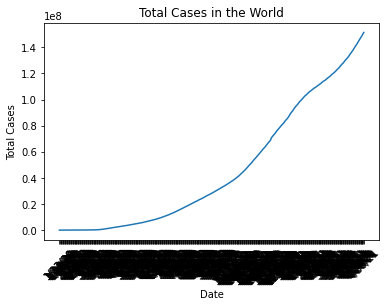

In [59]:
unclean_plot = plt.plot(df_world.date, df_world.total_cases)
unclean_plot = plt.xticks(rotation=45)
unclean_plot = plt.xlabel('Date')
unclean_plot = plt.ylabel('Total Cases')
unclean_plot = plt.title('Total Cases in the World')

After aggregating by the month we are able to read the dates and we can further examine in which parts of the year did covid look like the number of cases increased the most. The curve seems to be the steepest at the end of 2020 - in November and Decemeber. We can look into  this further either using pandas or SQL.

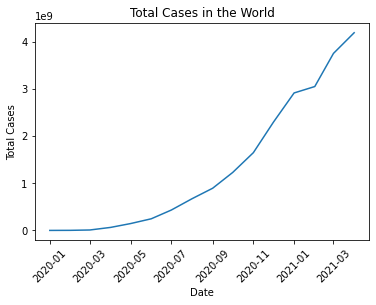

In [60]:
_ = plt.plot(grouped_data.date, grouped_data.total_cases)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total Cases')
_ = plt.title('Total Cases in the World')

### Q2 - From November 2020 to December 2020, which countries had the largest increase in total cases

In [61]:
df.drop(df[df.continent.isnull()].index, inplace=True) # drop all continents
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
sum_cases = df.groupby(['year', 'month', 'location']).sum()['new_cases'].reset_index()

In [62]:
sum_cases_nov_dec = sum_cases[(sum_cases.month == 11) | (sum_cases.month == 12)]
top10_country = sum_cases_nov_dec.groupby(['location']).sum()['new_cases'].sort_values(ascending=False).head(10)
top10_country

location
United States     10933744.0
Brazil             2140368.0
India              2082592.0
Russia             1521080.0
United Kingdom     1481440.0
Italy              1427736.0
France             1263302.0
Germany            1228730.0
Turkey             1010060.0
Poland              932147.0
Name: new_cases, dtype: float64

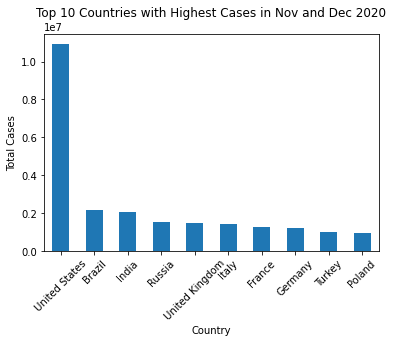

In [63]:
_ = top10_country.plot(kind='bar').xaxis.set_tick_params(rotation=45) 
_ = plt.xlabel('Country')
_ = plt.ylabel('Total Cases')
_ = plt.title('Top 10 Countries with Highest Cases in Nov and Dec 2020')

United states had by far the most amount of new cases from Nov to Dec 2020, followed by Brazil and India.

In [64]:
cases_continents = df.groupby(['year', 'month', 'continent']).sum()['new_cases'].reset_index()
cases_continents_nov_dec = cases_continents[(cases_continents.month == 11) | (cases_continents.month == 12)]
sum_cases_continents_nov_dec = cases_continents_nov_dec.groupby(['continent']).sum()['new_cases'].sort_values(ascending=False)
sum_cases_continents_nov_dec

continent
Europe           13844870.0
North America    12086448.0
Asia              6157185.0
South America     3529374.0
Africa             974985.0
Oceania              1253.0
Name: new_cases, dtype: float64

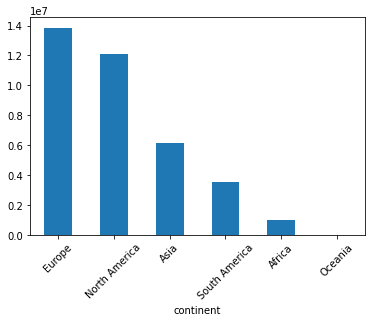

In [65]:
sum_cases_continents_nov_dec.plot(kind='bar').xaxis.set_tick_params(rotation=45)

If we examine the number of cases by continent we can see that Europe and North America had the most number of cases from Nov-Dec 2020. The low number of cases in Africa and could potentially be due to the low amount of testing occuring and COVID had potentially not reached Oceania yet. As we now know, Australia had faced multiple COVID breakouts which resulted in many border restrictions and city wide lockdowns for social distancing but the data we have has not captured that.

#### Examining the US for the whole year of 2020

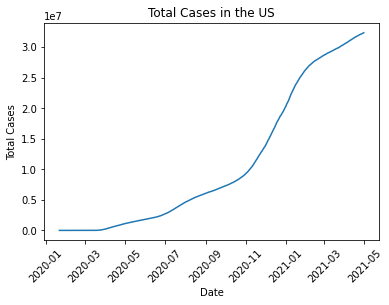

In [66]:
US = df[df.location == 'United States']
_ = plt.plot(US.date, US.total_cases)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total Cases')
_ = plt.title('Total Cases in the US')

In [67]:
brazil = df[df.location == 'Brazil']
india = df[df.location == 'India']
russia = df[df.location == 'Russia']
uk = df[df.location == 'United Kingdom']


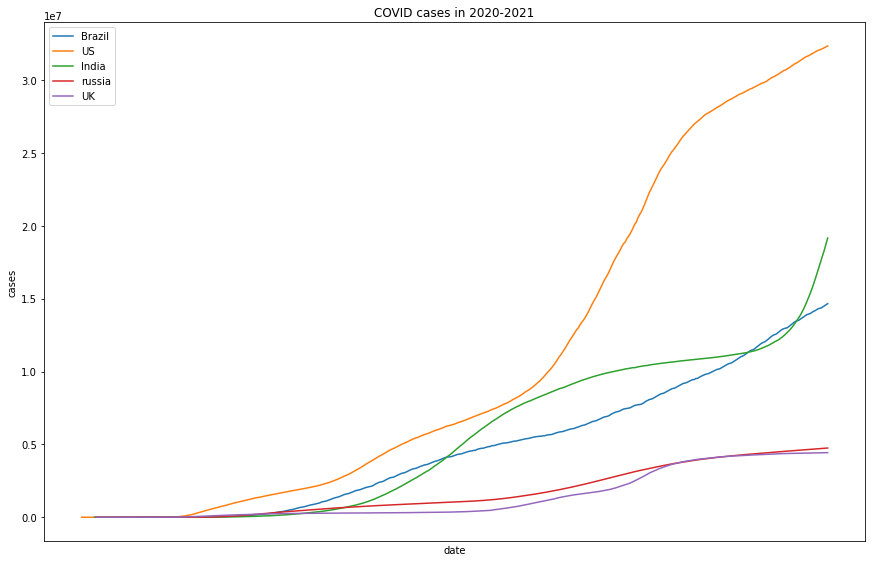

In [68]:
_ = plt.plot(brazil.date, brazil.total_cases, label='Brazil')
_ = plt.plot(US.date, US.total_cases, label='US')
_ = plt.plot(india.date, india.total_cases, label='India')
_ = plt.plot(russia.date, russia.total_cases, label='russia')
_ = plt.plot(uk.date, uk.total_cases, label='UK')
_ = plt.legend()
plt.title("COVID cases in 2020-2021")
plt.ylabel("cases")
plt.xlabel('date')
plt.xticks([])
plt.subplots_adjust(left=0.1, bottom=0.2, right=2, top=2, wspace=0.2, hspace=0.4)

In [69]:
total_cases_year = df.groupby(['year', 'location']).max()['total_cases'].sort_values(ascending=False).reset_index()
year_2020 = total_cases_year[total_cases_year.year == 2020].sort_values(ascending=False ,by='total_cases')
year_2020.head(10)

,year,location,total_cases
1,2020,United States,20099363.0
4,2020,India,10266674.0
5,2020,Brazil,7675973.0
13,2020,Russia,3127347.0
17,2020,France,2677666.0
19,2020,United Kingdom,2496235.0
21,2020,Turkey,2208652.0
23,2020,Italy,2107166.0
24,2020,Spain,1928265.0
26,2020,Germany,1760520.0


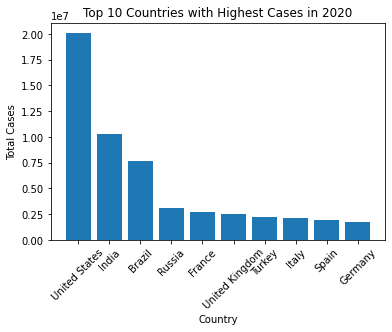

In [70]:
_ = plt.bar(year_2020.location.head(10), year_2020.total_cases.head(10))
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Country')
_ = plt.ylabel('Total Cases')
_ = plt.title('Top 10 Countries with Highest Cases in 2020')

### Q3 What are some factors that contribute more to a country having more COVID cases

In [78]:
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [77]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,percentage_infected,month,year
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,0.000003,2,2020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,0.000003,2,2020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,0.000003,2,2020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,0.000003,2,2020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,0.000003,2,2020


In [75]:
m = smf.ols("total_cases ~ total_tests + median_age + population_density + population + cardiovasc_death_rate + handwashing_facilities + life_expectancy + human_development_index"
            ,data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 3.755e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:01:19   Log-Likelihood:            -2.2671e+05
No. Observations:               16204   AIC:                         4.534e+05
Df Residuals:                   16195   BIC:                         4.535e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.371e+05   4.66e+04     -9.389      0.000   -5.28e+05   -3.46e+05
total_tests                 0.0539      0.000    354.734      0.000       0.054       0.054
median_age              -8662.2677    641.122    -13.511      0.000   -9918.938   -7405.597
population_density        -60.9175      8.579     -7.101      0.000     -77.734     -44.101
population                  0.0006   1.54e-05     39.603      0.000       0.001       0.001
cardiovasc_death_rate    -459.0328     27.671    -16.589      0.000    -513.272    -404.794
handwashing_facilities  -1492.7441    141.907    -10.519      0.000   -1770.897   -1214.591
life_expectancy           794.8825    831.194      0.956      0.339    -834.349    2424.114
human_development_index  1.338e+06   5.03e+04     26.619      0.000    1.24e+06    1.44e+06
==============================================================================
Omnibus:                     9286.013   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187838.981
Skew:                           2.347   Prob(JB):                         0.00
Kurtosis:                      19.005   Cond. No.                     5.15e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Intepreting Results
We built a mutiple regression model with total cases as our dependent variable and total tests, median age, population density, population, cardiovascular death rate, handwashing facilities, life expectancy and human development index (HDI) as our independent variables.

Our initial multi-regression model looks promising, our R^2 value is close to 1 telling us that the variables we have chose explain a large proportion of our data and our F statistic is low which indicates that our results are statistically significant. An increase in cases seems to be statistically associated with a larger population as well as more testing, common sense can tell us this. We can also see that locations with more cases have less handwashing facilities. What is more interesting is that health indicators like life expectancy, median age and HDI all show that countries with a higher life expectancy, median age and HDI have more cases compared. This can most probably be explained by the undereporting or under testing of the other countries, either voluntarily or because there was a shortage of COVID-19 tests as there was a global shortage of tests.

In [80]:
m = smf.ols("total_deaths ~ total_tests + median_age + population_density + population + cardiovasc_death_rate + handwashing_facilities + life_expectancy + human_development_index"
            ,data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_deaths   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2136.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:55:29   Log-Likelihood:            -1.7098e+05
No. Observations:               15254   AIC:                         3.420e+05
Df Residuals:                   15245   BIC:                         3.420e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.395e+04   2927.500     -4.764      0.000   -1.97e+04   -8207.761
total_tests                 0.0007   9.42e-06     69.262      0.000       0.001       0.001
median_age               -732.6809     40.183    -18.234      0.000    -811.444    -653.918
population_density         -6.4975      0.548    -11.854      0.000      -7.572      -5.423
population               2.435e-05   9.56e-07     25.483      0.000    2.25e-05    2.62e-05
cardiovasc_death_rate     -38.9279      1.757    -22.160      0.000     -42.371     -35.485
handwashing_facilities      0.5174      9.042      0.057      0.954     -17.207      18.242
life_expectancy           -54.5708     52.475     -1.040      0.298    -157.427      48.286
human_development_index  7.824e+04   3233.935     24.194      0.000    7.19e+04    8.46e+04
==============================================================================
Omnibus:                    18270.407   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2063851.992
Skew:                           6.514   Prob(JB):                         0.00
Kurtosis:                      58.475   Cond. No.                     5.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now examining total deaths as our dependent variable it reflects the same sentiment as we have found before using the same independent variables but with total cases as our dependent variable.